In [28]:
import os, glob

import matplotlib.pyplot as plt
import numpy as np
import h5py
import dask.array as da

In [245]:
# Load simulation data

sim_data_path = r"C:\Users\Sauron\Documents\GitHub\strankslab\ml_difsims\data\simulations\sim-ef965998-5424-4cc1-bbcf-8fb61f96f0ac.hdf5"

## Load data
with h5py.File(sim_data_path, 'r') as f:
    sim_data = f['2d'][f'x_px']
    sim_data = da.array(sim_data)
    sim_labels = f['2d'][f'y_px']
    sim_labels = da.array(sim_labels).compute()
    phase_names = f['metadata'].attrs['phases']
    x = sim_data[:29].compute()
    q_axis = f['1d']['x_all_q_axis']
    q_axis = np.array(q_axis)

phase_names = [s for s in phase_names]
sim_data

dask.array<array, shape=(30, 147, 360), dtype=float64, chunksize=(30, 147, 360), chunktype=numpy.ndarray>

In [235]:
sim_labels.shape

(30,)

In [236]:
phase_names

['p4mbm_scaled_mixed_halide', 'gratia_2h', 'pbi2_2h']

C:\Users\Sauron\AppData\Local\Temp\ipykernel_33152\2994461983.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


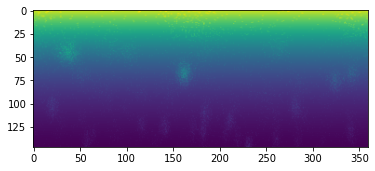

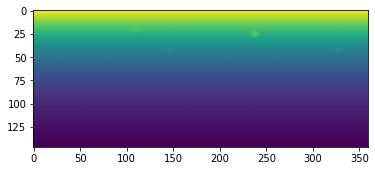

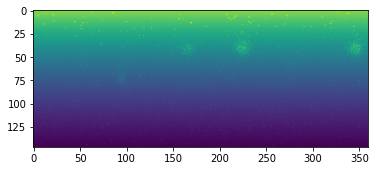

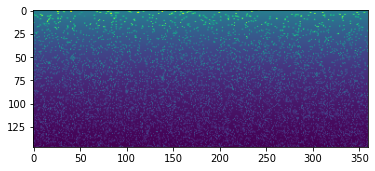

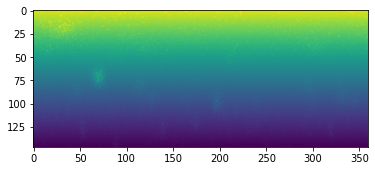

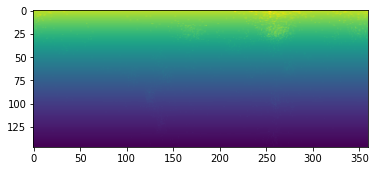

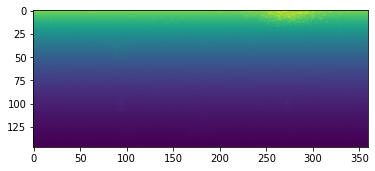

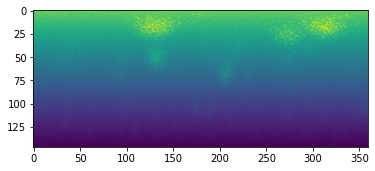

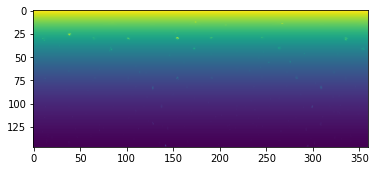

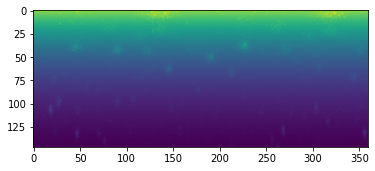

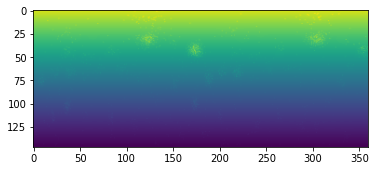

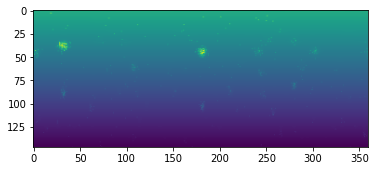

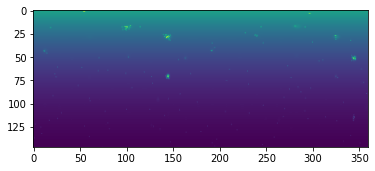

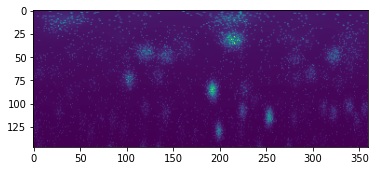

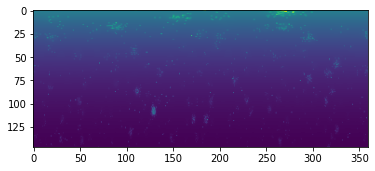

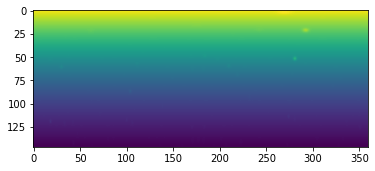

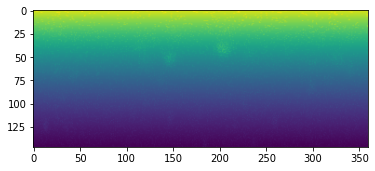

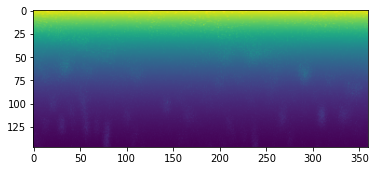

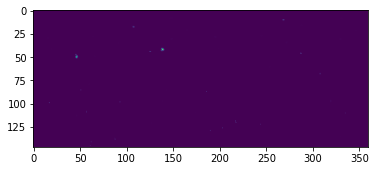

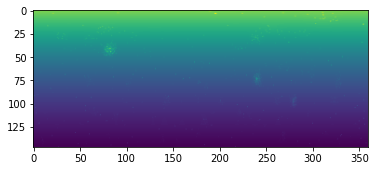

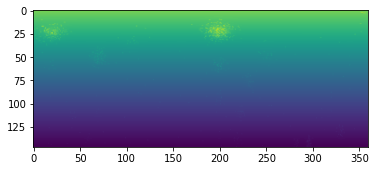

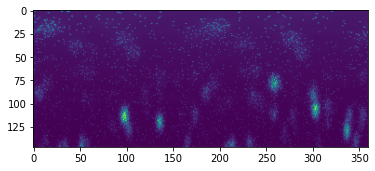

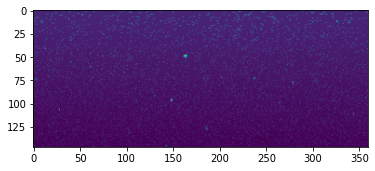

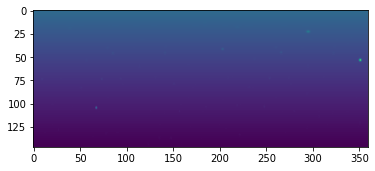

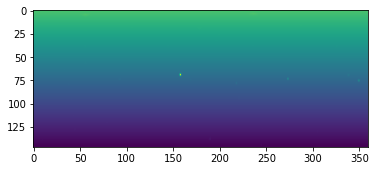

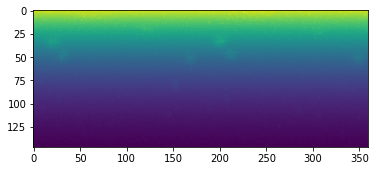

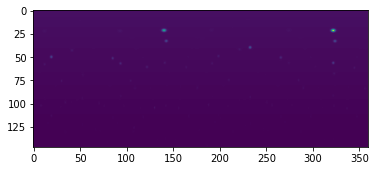

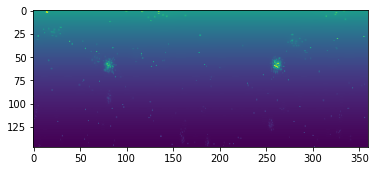

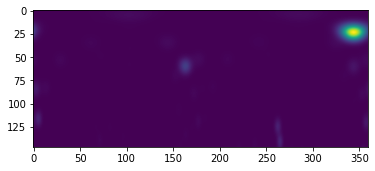

In [248]:
import matplotlib.pyplot as plt
for i in range(29):
    plt.figure()
    plt.imshow(x[i])

In [226]:
q = q_axis[13:160]

def exp_decay(x, A, tau):
    return A * np.exp(- tau * x)

a, tau = np.array([1]), np.array([2.5])
# Do array broadcasting to calculate function
a_val = np.array(a[:, np.newaxis], dtype=float)
tau_val = np.array(tau[:, np.newaxis], dtype=float)

bkg = exp_decay(q, a_val, tau_val)
print(bkg.shape)
print(x.shape)
bkg

(1, 147)
(2, 147, 360)


array([[0.76380579, 0.74813786, 0.73279133, 0.7177596 , 0.70303622,
        0.68861486, 0.67448932, 0.66065354, 0.64710157, 0.63382759,
        0.6208259 , 0.60809092, 0.59561717, 0.58339929, 0.57143203,
        0.55971026, 0.54822894, 0.53698314, 0.52596801, 0.51517885,
        0.504611  , 0.49425993, 0.48412118, 0.47419042, 0.46446336,
        0.45493584, 0.44560375, 0.4364631 , 0.42750994, 0.41874044,
        0.41015083, 0.40173742, 0.39349659, 0.3854248 , 0.37751859,
        0.36977456, 0.36218939, 0.35475981, 0.34748263, 0.34035473,
        0.33337304, 0.32653457, 0.31983637, 0.31327558, 0.30684936,
        0.30055497, 0.2943897 , 0.28835089, 0.28243595, 0.27664235,
        0.2709676 , 0.26540924, 0.25996491, 0.25463226, 0.24940899,
        0.24429287, 0.2392817 , 0.23437332, 0.22956563, 0.22485655,
        0.22024408, 0.21572622, 0.21130103, 0.20696662, 0.20272112,
        0.19856271, 0.19448959, 0.19050003, 0.18659231, 0.18276475,
        0.1790157 , 0.17534356, 0.17174674, 0.16

In [227]:
dat_shape = x.shape[-2:]
n_angles = dat_shape[-1]
nav_size = bkg.shape[0]

bkg_2d = np.repeat(bkg[:,:,np.newaxis], n_angles, axis=-1)
x_bkg = bkg_2d + x[0]

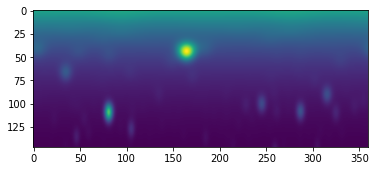

In [230]:
plt.imshow(x_bkg[0])

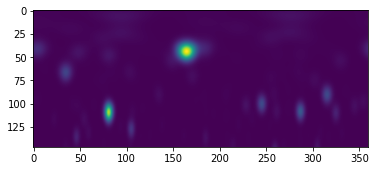

In [164]:
plt.imshow(x[0])

In [ ]:
np.array(x).max([-2,-1])

In [131]:
x.max([-2, -1])

TypeError: 'list' object cannot be interpreted as an integer